In [ ]:
import polars as pl

df = pl.read_excel(r"m:\OneDrive - Umich\humanitarian-multimodal\data\Airlink - UMichiagn - Data Collection - 9.8.2025.xlsx", read_options={"header_row": 1})

In [3]:
# add col called diff which is GIK - Long
df = df.with_columns((pl.col("GIK Value Delivered by Airlink (=Value delivered - NGO payments - Invoiced)") - pl.col("Commercial Cost for Long-Haul")).alias("diff"))
pl.Config.set_tbl_rows(500)

df2 = df.filter([
    pl.col("diff").le(0)
])
display(df2)
# display(df)
# # Convert to Pandas DataFrame
# df_pandas = df.to_pandas()

# # Apply sticky header using Pandas Styler
# df_pandas.style.set_sticky(axis="columns")
# # display all rows
# import pandas as pd
# pd.set_option('display.max_rows', None)
# display(df_pandas)

# NOTE
"""
Intuition, where diff is positive 
"""

NGO ID,Shipment ID,Received,Deadline Date,Origin,Destination,Cargo Ready Date,Depart,Arrive,Forwarder,AWB #,Airlink Partner,Aircraft Type,AW (kg),CBM,Pallets,Incoterms,Last-mile Requested,Consignee,NGO Payments,Commercial Cost for First Mile,Commercial Cost for Long-Haul,Commercial Cost for Last Mile,Total Value Delivered,GIK Value Delivered by Airlink (=Value delivered - NGO payments - Invoiced),Airline,Valuation Source,diff
str,str,date,str,str,str,date,date,date,str,str,str,str,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,str,str,f64
"""NP015""","""24-0315""",2024-10-02,"""2024-10-10""","""YYZ""","""PAP""",2024-10-03,2025-02-07,2025-02-20,"""PWS""","""001-86266633""","""American Airlines""","""Narrowbody""",264.45,1.887,3.0,"""CPT""","""Yes""","""CENTRE MEDICAL BERACA - Dr. Al…",null,533.66,4690.0,null,5223.66,4690.0,"""American Airlines""","""Online Calculator""",0.0
"""NP187""","""24-0337""",2024-12-10,"""2024-12-10""","""DXB""","""BEY""",2024-12-16,2025-01-05,2025-01-05,"""PWS""","""076-43047911""","""Commercial""","""Widebody""",704.0,2.688,2.0,"""DAT""","""No""","""YMCA of Lebanon, Delta Center,…",0.0,0.0,3790.0,0.0,3790.0,0.0,"""Commercial""","""Commercial Rate""",-3790.0
"""NP015""","""24-0341""",2024-12-19,"""2025-01-10""","""YYZ""","""TLV""",2025-01-02,2025-02-13,2025-02-15,"""PWS""","""700-74270232""","""Commercial""","""Widebody""",1583.0,5.664,4.0,"""CPT""","""No""","""ANERA 13 NABLUS ROAD SHE…",null,1638.66,8801.0,null,10439.66,0.0,"""Commercial""","""Commercial Rate""",-8801.0
"""NP269""","""24-0342""",2024-12-24,"""2024-12-26""","""JAX""","""VLI""",2024-12-24,2025-01-13,2025-01-17,"""PWS""","""260-40755245""","""United Airlines, Fiji Airways""","""Narrowbody""",108.42,1.0069,1.0,"""CPT""","""No""","""Peter Judge Vanuatu Business R…",0.0,1999.43,3158.0,0.0,5157.43,3158.0,"""United Airlines, Fiji Airways""","""Online Calculator""",0.0
"""NP285,NP127""","""24-0344""",2024-12-30,"""2025-01-06""","""LGG""","""NDJ""",2024-12-30,2025-01-24,2025-02-09,"""SEKO""","""071-54528585""","""Commercial""","""Widebody""",1886.0,7.727,6.0,"""DAP""","""Yes""","""INTERSOS Sudan Geneina Office …",0.0,1378.69,9851.24,15605.89,26835.82,-17186.13,"""Commercial""","""Commercial Rate""",-27037.37
"""NP224""","""24-0345""",2024-12-30,"""2025-01-06""","""SHJ""","""NDJ""",2025-01-06,2025-01-25,2025-02-12,"""SEKO""","""071-55544366""","""Commercial""","""Freighter""",16474.0,154.67,116.0,"""DAP""","""Yes""","""NTERSOS SUDAN Binay Basyal H…",0.0,9166.65,148229.25,185150.98,342546.88,13750.0,"""Commercial""","""Commercial Rate""",-134479.25
"""NP206""","""24-0360""",2024-12-13,"""2024-11-25""","""MIA""","""PAP""",null,2025-02-25,2025-03-11,"""PWS""","""810-43041515""","""Amerijet""","""Freighter""",127.913,0.666,1.0,"""DAP""",null,"""Parole and Action""",null,1211.64,384.0,null,1595.64,0.0,"""Amerijet""","""Commercial Rate""",-384.0
"""NP090""","""25-0002""",2025-01-06,"""2025-02-07""","""MIA""","""PAP""",2025-01-06,2025-03-03,2025-03-07,"""SEKO""","""810-40120452""","""Amerijet""","""Freighter""",70.7604,0.912,1.0,"""CIP""","""No""","""Partners In Health Zanmi Lasan…",null,1750.0,378.0,null,2128.0,0.0,"""Amerijet""","""Commercial Rate""",-378.0
"""NP090""","""25-0003""",2025-01-06,"""2025-02-07""","""MIA""","""PAP""",2025-01-10,2025-03-03,2025-03-07,"""SEKO""","""810-40120441""","""Amerijet""","""Freighter""",325.0,3.31,2.0,"""CIP""","""No""","""Zanmi Lasante Attn: Loune Vi…",null,1750.0,1659.0,null,3409.0,0.0,"""Amerijet""","""Commercial Rate""",-1659.0


'\nIntuition, where diff is positive \n'

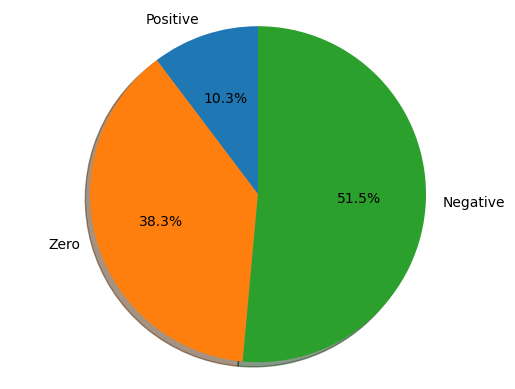

In [4]:
# make a pie chart of the share of positive, zero and negative diff
import matplotlib.pyplot as plt

# Count the number of positive, zero, and negative diffs
labels = ['Positive', 'Zero', 'Negative']
sizes = [
    df.filter(pl.col("diff") > 0).shape[0],
    df.filter(pl.col("diff") == 0).shape[0],
    df.filter(pl.col("diff") < 0).shape[0]
]

# Plot
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

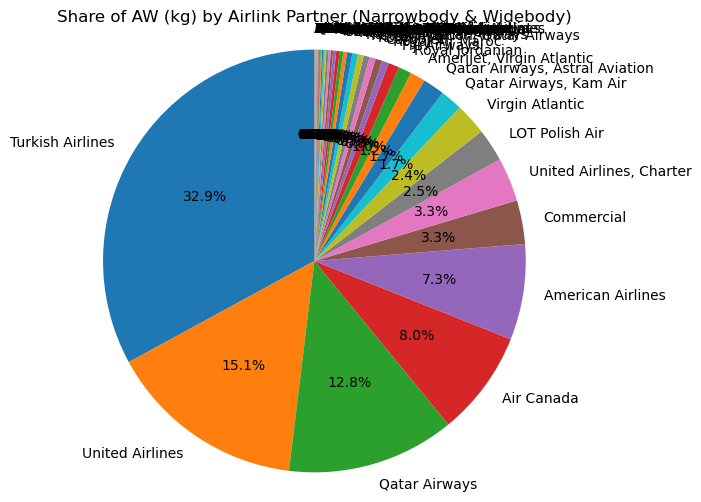

In [5]:
#  Filter rows for Narrowbody or Widebody
df_filtered = df.filter(
    pl.col("Aircraft Type").is_in(["Narrowbody", "Widebody"])
)

# Group by Airlink Partner and sum AW (kg)
df_sum = (
    df_filtered
    .group_by("Airlink Partner")
    .agg(pl.col("AW (kg)").sum().alias("Total_AW"))
    .sort("Total_AW", descending=True)
)

# Extract labels and values
labels = df_sum["Airlink Partner"].to_list()
sizes = df_sum["Total_AW"].to_list()

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
ax.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.title("Share of AW (kg) by Airlink Partner (Narrowbody & Widebody)")

plt.show()

C:\Users\micah\AppData\Local\Temp\ipykernel_38764\460868389.py:30: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  subset = df_grouped.filter(pl.col("Year") == year)


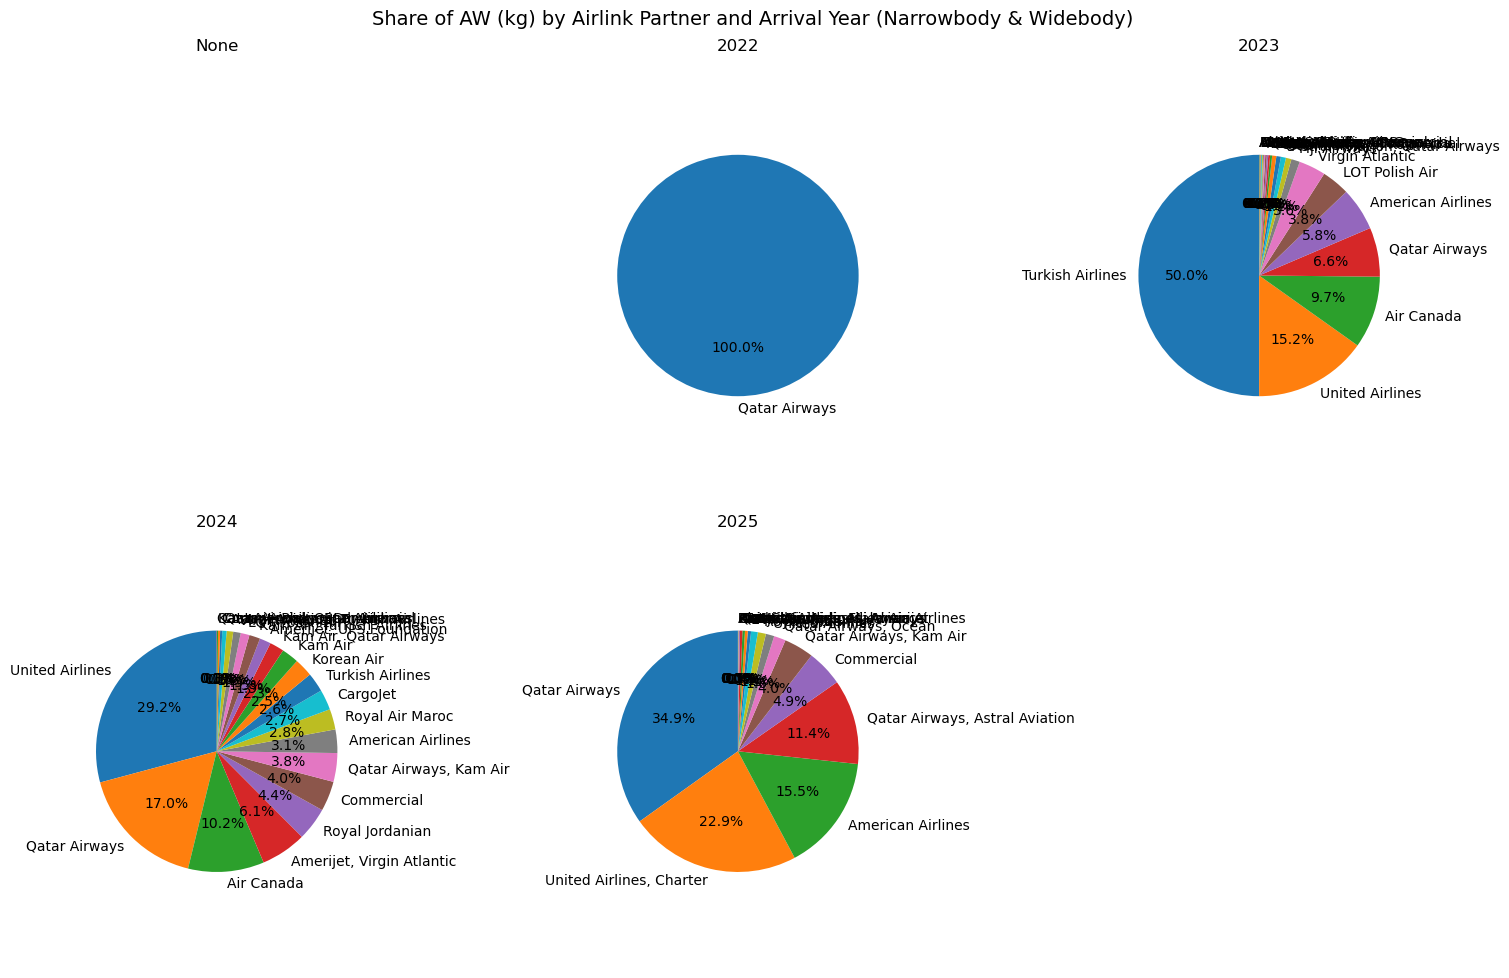

In [6]:
# Filter for Narrowbody and Widebody only
df_filtered = df.filter(
    pl.col("Aircraft Type").is_in(["Narrowbody", "Widebody"])
)

# If Arrive is already a date, extract year directly
df_filtered = df_filtered.with_columns(
    pl.col("Arrive").dt.year().alias("Year")
)

# Group by Year and Airlink Partner, summing AW (kg)
df_grouped = (
    df_filtered
    .group_by(["Year", "Airlink Partner"])
    .agg(pl.col("AW (kg)").sum().alias("Total_AW"))
    .sort(["Year", "Total_AW"], descending=[True, True])
)

# Get list of years
years = df_grouped["Year"].unique().sort()

# Prepare subplots (e.g., 3 columns)
cols = 3
rows = -(-len(years) // cols)  # ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

# Plot one pie per year
for i, year in enumerate(years):
    subset = df_grouped.filter(pl.col("Year") == year)
    labels = subset["Airlink Partner"].to_list()
    sizes = subset["Total_AW"].to_list()
    
    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].axis('equal')
    axes[i].set_title(f"{year}")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Share of AW (kg) by Airlink Partner and Arrival Year (Narrowbody & Widebody)", fontsize=14)
plt.tight_layout()
plt.show()

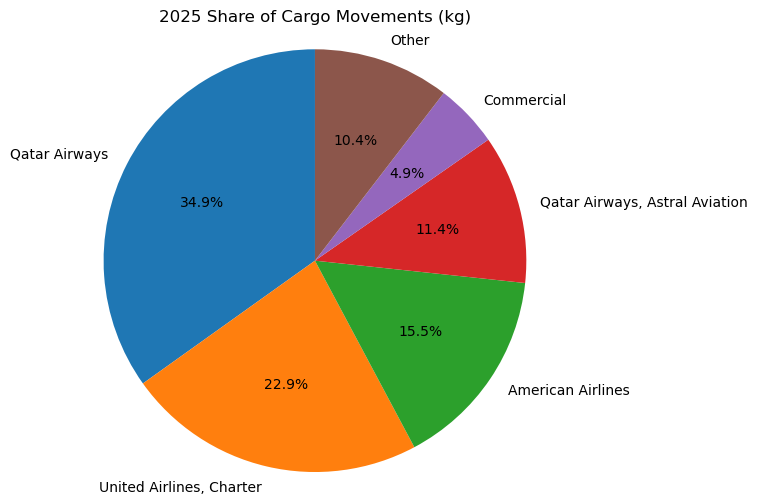

In [12]:
# Filter for Narrowbody and Widebody only
df_filtered = df.filter(
    pl.col("Aircraft Type").is_in(["Narrowbody", "Widebody"])
)

# Extract year from Arrive (if it's a date)
df_filtered = df_filtered.with_columns(
    pl.col("Arrive").dt.year().alias("Year")
)

# Group by Year and Airlink Partner, summing AW (kg)
df_grouped = (
    df_filtered
    .group_by(["Year", "Airlink Partner"])
    .agg(pl.col("AW (kg)").sum().alias("Total_AW"))
    .sort(["Year", "Total_AW"], descending=[True, True])
)

# --- Focus only on 2025 ---
df_2025 = df_grouped.filter(pl.col("Year") == 2025)

# --- Keep only top 5 and combine others into 'Other' ---
df_top5 = df_2025.sort("Total_AW", descending=True).head(5)
top5_partners = df_top5["Airlink Partner"].to_list()

# Compute 'Other' category if applicable
other_sum = (
    df_2025.filter(~pl.col("Airlink Partner").is_in(top5_partners))["Total_AW"].sum()
)

# Match dtype of Year column
year_dtype = df_top5.schema["Year"]
year_value = pl.Series("Year", [2025]).cast(year_dtype)[0]

# Combine into one Polars DataFrame
if other_sum > 0:
    df_plot = pl.concat([
        df_top5,
        pl.DataFrame({
            "Year": pl.Series([2025], dtype=year_dtype),
            "Airlink Partner": ["Other"],
            "Total_AW": [other_sum]
        })
    ])
else:
    df_plot = df_top5

# --- Plot single pie chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    df_plot["Total_AW"].to_list(),
    labels=df_plot["Airlink Partner"].to_list(),
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')
plt.title("2025 Share of Cargo Movements (kg)")
plt.show()
